<a href="https://colab.research.google.com/github/myschl/ML-DL/blob/master/Class_Activation_Map_(CAM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.






553467904/553467096 [==============================] - 6s 0us/step








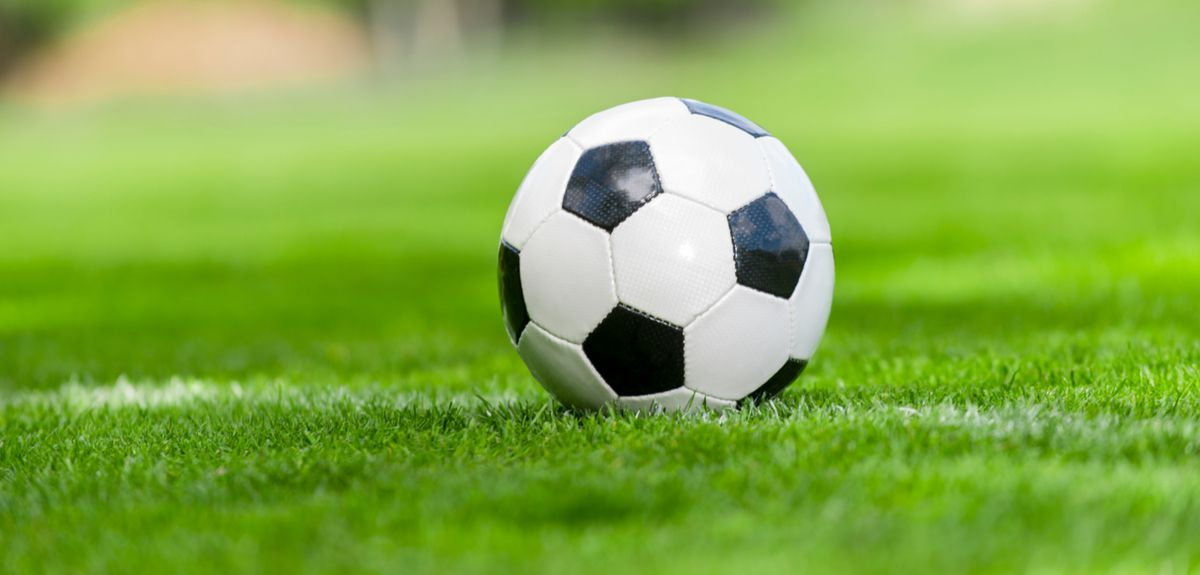

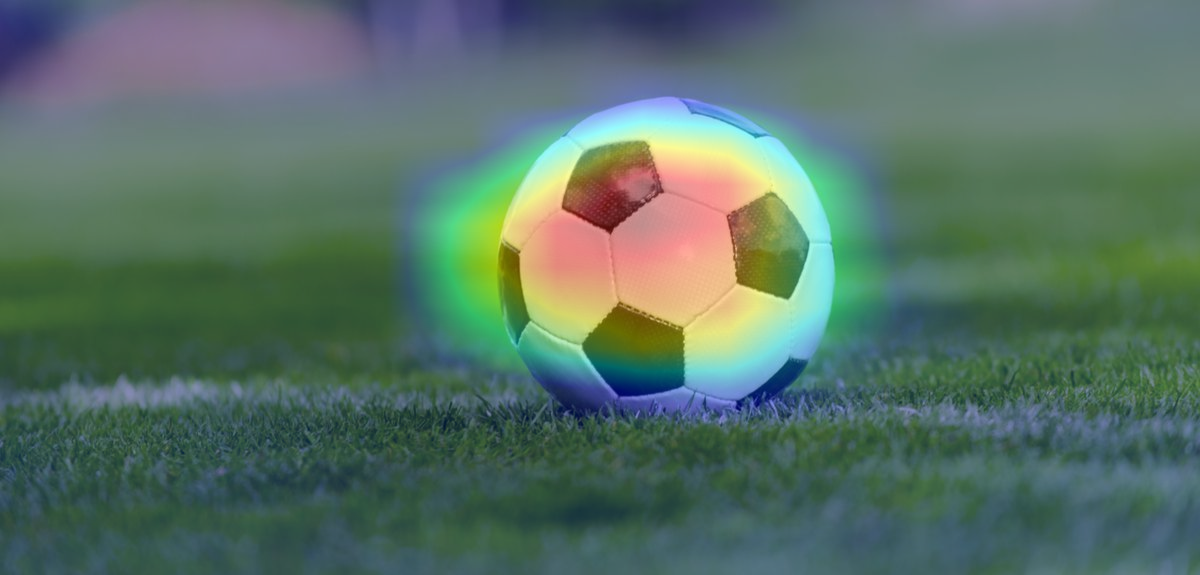

-1

In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from google.colab.patches import cv2_imshow
from tensorflow.keras import layers, models
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys


model = VGG16(weights="imagenet")

img_path = '/content/football.jpg'
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]

last_conv_layer = model.get_layer("block5_conv3")

# last_conv_layer = covmodel.get_layer('vgg16').get_layer('block5_conv3')

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
cv2_imshow(img)
cv2_imshow(superimposed_img)
cv2.waitKey(0)